In [1]:
from functions import *
from bayes_opt import BayesianOptimization

In [2]:
n=5
T=0.1
t_max=20
interpolator_kind='cubic'

In [3]:
def loss_ra(x1,x2,x3):
    '''
    Computes the negative average delta for multiple random Ising models 
    using for a given ramp-up schedule and maximum time.
    '''
    n_random_models = 1

    ramp_up_schedule = [x1,x2,x3]

    schedule = get_symmetric_schedule(ramp_up_schedule) # mirror and append the ramp up schedule
    schedule_interpolator = get_schedule_interpolator(schedule, kind=interpolator_kind) # get an interpolating function for the continuos schedule
    
    delta_sum = 0    
    for seed in range(n_random_models):
        m = RandomIsingModel(n=n, seed=seed)
        proposal_mat_ra = get_proposal_mat_ra(m, schedule_interpolator, t_max, assert_symmetry=False)
        P = get_transition_matrix(m, T, proposal_mat_ra)
        delta_sum += get_delta(P)
    
    delta_avg = delta_sum / n_random_models
    return delta_avg

In [4]:
pbounds = {'x1': (0,4), 'x2': (0,4), 'x3': (0,4)}

optimizer = BayesianOptimization(
    f=loss_ra,
    pbounds=pbounds,
    random_state=1,
)

In [5]:
optimizer.maximize(
    init_points=10,
    n_iter=1000,
)

|   iter    |  target   |    x1     |    x2     |    x3     |
-------------------------------------------------------------


| 1         | 0.03606   | 1.668     | 2.881     | 0.0004575 |


| 2         | 0.00576   | 1.209     | 0.587     | 0.3694    |


| 3         | 0.04434   | 0.745     | 1.382     | 1.587     |


| 4         | 0.08887   | 2.155     | 1.677     | 2.741     |


| 5         | 0.01784   | 0.8178    | 3.512     | 0.1096    |


| 6         | 0.06166   | 2.682     | 1.669     | 2.235     |


| 7         | 0.07456   | 0.5615    | 0.7924    | 3.203     |


| 8         | 0.09672   | 3.873     | 1.254     | 2.769     |


| 9         | 0.003685  | 3.506     | 3.578     | 0.3402    |


| 10        | 0.01413   | 0.1562    | 0.6793    | 3.513     |


| 11        | 0.07631   | 0.5116    | 0.8104    | 3.185     |


| 12        | 0.08668   | 3.5       | 1.358     | 2.709     |


| 13        | 0.01493   | 3.71      | 1.173     | 3.268     |


| 14        | 0.01805   | 0.9101    | 0.6224    | 3.789     |


| 15        | 0.07884   | 2.905     | 2.914     | 0.7788    |


| 16        | 0.05196   | 3.803     | 1.458     | 2.507     |


| 17        | 0.07654   | 3.822     | 2.656     | 1.883     |


| 18        | 0.00813   | 1.955     | 3.365     | 3.916     |


| 19        | 0.04497   | 3.742     | 1.063     | 2.735     |


| 20        | 0.08634   | 3.884     | 1.394     | 2.853     |


| 21        | 0.0664    | 2.708     | 2.192     | 1.533     |


| 22        | 0.07524   | 2.668     | 1.671     | 2.226     |


| 23        | 0.02543   | 1.096     | 3.057     | 0.2675    |


| 24        | 0.05483   | 3.83      | 1.394     | 2.804     |


| 25        | 0.0004697 | 2.393     | 0.4508    | 0.4671    |


| 26        | 1.87e-05  | 2.454     | 2.23      | 2.614     |


| 27        | 0.0713    | 2.632     | 1.646     | 2.176     |


| 28        | 0.08901   | 3.889     | 1.262     | 2.825     |


| 29        | 0.01995   | 2.136     | 1.577     | 2.801     |


| 30        | 0.009431  | 3.848     | 1.406     | 2.937     |


| 31        | 0.008043  | 0.4747    | 0.8363    | 3.268     |


| 32        | 0.0002712 | 0.9202    | 0.2591    | 2.815     |


| 33        | 0.01839   | 2.161     | 1.752     | 2.695     |


| 34        | 0.09653   | 2.394     | 0.4605    | 1.637     |


| 35        | 0.0559    | 3.357     | 1.674     | 1.184     |


| 36        | 0.04587   | 3.88      | 1.175     | 2.808     |


| 37        | 0.05314   | 2.336     | 0.4402    | 1.652     |


| 38        | 0.05246   | 0.172     | 1.659     | 0.02117   |


| 39        | 0.0693    | 2.394     | 0.443     | 1.654     |


| 40        | 0.08448   | 3.478     | 1.38      | 2.685     |


| 41        | 0.1158    | 3.894     | 1.326     | 2.801     |


| 42        | 0.07189   | 0.4128    | 0.2286    | 1.479     |


| 43        | 0.05779   | 1.748     | 0.7739    | 0.3031    |


| 44        | 0.09209   | 3.52      | 1.448     | 2.673     |


| 45        | 0.05506   | 0.5539    | 0.7956    | 3.22      |


| 46        | 0.05144   | 2.456     | 0.49      | 1.581     |


| 47        | 0.09917   | 3.854     | 1.26      | 2.708     |


| 48        | 0.1001    | 3.86      | 1.361     | 2.754     |


| 49        | 0.08946   | 3.567     | 1.45      | 2.635     |


| 50        | 0.01653   | 1.019     | 3.382     | 0.5226    |


| 51        | 0.004112  | 3.019     | 0.9455    | 3.501     |


| 52        | 0.09123   | 0.5868    | 0.8599    | 3.13      |


| 53        | 0.06737   | 3.243     | 2.989     | 3.558     |


| 54        | 0.05974   | 3.925     | 1.324     | 2.653     |


| 55        | 0.1226    | 3.95      | 1.315     | 2.806     |


| 56        | 0.05517   | 3.994     | 1.351     | 2.794     |


| 57        | 0.003583  | 2.38      | 0.5233    | 1.635     |


| 58        | 0.08982   | 3.563     | 1.366     | 2.572     |


| 59        | 0.06746   | 2.639     | 1.724     | 2.145     |


| 60        | 0.07071   | 0.6137    | 0.814     | 3.181     |


| 61        | 0.09356   | 3.858     | 1.254     | 2.847     |


| 62        | 0.13      | 0.1688    | 2.631     | 3.965     |


| 63        | 0.06761   | 0.1472    | 2.658     | 3.964     |


| 64        | 0.001346  | 0.4346    | 3.262     | 3.899     |


| 65        | 0.1039    | 3.487     | 0.7144    | 1.675     |


| 66        | 0.08552   | 0.2876    | 0.6244    | 2.71      |


| 67        | 0.03942   | 3.885     | 1.221     | 2.617     |


| 68        | 0.05277   | 3.604     | 1.4       | 2.557     |


| 69        | 0.1159    | 3.854     | 1.309     | 2.797     |


| 70        | 0.04411   | 1.029     | 2.966     | 2.644     |


| 71        | 0.08987   | 3.535     | 1.439     | 2.683     |


| 72        | 0.04293   | 0.345     | 2.189     | 0.5801    |


| 73        | 0.07098   | 3.506     | 1.399     | 2.777     |


| 74        | 0.06362   | 0.2257    | 2.671     | 3.969     |


| 75        | 0.08675   | 3.915     | 1.344     | 2.777     |


| 76        | 0.0535    | 0.5546    | 0.8049    | 3.131     |


| 77        | 0.04594   | 3.558     | 1.394     | 2.653     |


| 78        | 0.09264   | 3.864     | 1.34      | 2.699     |


| 79        | 0.07393   | 3.869     | 1.299     | 2.764     |


| 80        | 0.1391    | 3.423     | 0.7304    | 1.724     |


| 81        | 0.007203  | 1.833     | 3.877     | 2.276     |


| 82        | 0.1026    | 3.823     | 1.354     | 2.706     |


| 83        | 0.03541   | 0.5379    | 3.755     | 0.03788   |


| 84        | 0.06892   | 3.401     | 0.661     | 1.756     |


| 85        | 0.03568   | 0.7071    | 0.8369    | 2.122     |


| 86        | 0.01969   | 3.302     | 0.4796    | 2.233     |


| 87        | 0.06791   | 0.1031    | 2.667     | 3.959     |


| 88        | 0.07202   | 2.046     | 2.843     | 3.732     |


| 89        | 0.07082   | 3.582     | 1.493     | 2.712     |


| 90        | 0.08332   | 3.324     | 3.361     | 2.15      |


| 91        | 0.08105   | 3.801     | 1.273     | 2.826     |


| 92        | 0.01261   | 3.17      | 0.5636    | 3.169     |


| 93        | 0.1266    | 3.814     | 1.356     | 2.748     |


| 94        | 0.008548  | 1.56      | 0.1412    | 0.6194    |


| 95        | 0.0004578 | 0.1017    | 0.1445    | 0.1193    |


| 96        | 0.1158    | 3.418     | 0.7345    | 1.625     |


| 97        | 0.03963   | 3.832     | 1.413     | 2.673     |


| 98        | 0.1098    | 3.405     | 0.7179    | 1.683     |


| 99        | 0.08995   | 3.34      | 0.7308    | 1.631     |


| 100       | 0.09371   | 3.375     | 0.7899    | 1.595     |


| 101       | 0.09318   | 3.377     | 0.6856    | 1.649     |


| 102       | 0.03162   | 0.1522    | 2.594     | 3.944     |


| 103       | 0.0006079 | 2.556     | 0.3966    | 0.574     |


| 104       | 0.08686   | 3.498     | 0.6583    | 1.613     |


| 105       | 0.1014    | 3.431     | 0.7083    | 1.622     |


| 106       | 0.03201   | 1.594     | 2.624     | 1.137     |


| 107       | 0.1224    | 3.732     | 1.381     | 2.771     |


| 108       | 0.08155   | 3.79      | 1.31      | 2.799     |


| 109       | 0.1071    | 3.694     | 1.348     | 2.806     |


| 110       | 0.007536  | 1.18      | 0.03402   | 0.623     |


| 111       | 0.0129    | 3.601     | 3.26      | 2.676     |


| 112       | 0.04152   | 0.2252    | 2.693     | 3.472     |


| 113       | 0.1336    | 3.534     | 0.6961    | 1.594     |


| 114       | 0.1526    | 3.415     | 0.7903    | 1.64      |


| 115       | 0.08382   | 2.754     | 2.324     | 1.627     |


| 116       | 0.007843  | 3.532     | 0.6293    | 1.577     |


| 117       | 0.1276    | 3.404     | 0.7339    | 1.719     |


| 118       | 0.06425   | 3.681     | 1.283     | 2.866     |


| 119       | 0.02462   | 2.581     | 0.8183    | 2.634     |


| 120       | 0.1072    | 3.481     | 0.7889    | 1.597     |


| 121       | 0.06218   | 0.7045    | 0.7826    | 0.5532    |


| 122       | 0.03424   | 3.617     | 0.2148    | 0.5355    |


| 123       | 0.1081    | 3.51      | 0.7501    | 1.588     |


| 124       | 0.1027    | 3.386     | 0.7499    | 1.636     |


| 125       | 0.09566   | 3.384     | 0.7864    | 1.742     |


| 126       | 0.06278   | 3.725     | 1.345     | 2.748     |


| 127       | 0.04692   | 2.268     | 1.203     | 1.768     |


| 128       | 0.03676   | 3.921     | 1.333     | 2.884     |


| 129       | 0.1209    | 3.579     | 0.7332    | 1.537     |


| 130       | 0.09101   | 3.485     | 0.7635    | 1.715     |


| 131       | 0.04827   | 3.57      | 0.789     | 1.619     |


| 132       | 0.1201    | 3.445     | 0.754     | 1.75      |


| 133       | 0.09484   | 3.658     | 0.7339    | 1.519     |


| 134       | 0.01587   | 0.1619    | 2.131     | 1.756     |


| 135       | 0.1322    | 3.372     | 0.8107    | 1.591     |


| 136       | 0.1572    | 3.432     | 0.7719    | 1.673     |


| 137       | 0.04971   | 3.115     | 2.218     | 3.393     |


| 138       | 0.04253   | 3.42      | 0.8278    | 1.689     |


| 139       | 0.09608   | 3.439     | 0.7925    | 1.527     |


| 140       | 0.05203   | 3.76      | 1.392     | 2.796     |


| 141       | 0.004509  | 1.627     | 2.936     | 0.4179    |


| 142       | 0.1238    | 0.2115    | 2.617     | 3.987     |


| 143       | 0.1442    | 3.68      | 0.6671    | 1.565     |


| 144       | 0.04611   | 2.679     | 2.68      | 1.956     |


| 145       | 0.001374  | 1.638     | 3.39      | 2.137     |


| 146       | 0.0337    | 0.3352    | 3.673     | 0.2831    |


| 147       | 0.004441  | 2.116     | 0.566     | 3.717     |


| 148       | 0.111     | 3.623     | 1.372     | 2.818     |


| 149       | 0.02219   | 2.334     | 2.153     | 0.8433    |


| 150       | 0.141     | 3.633     | 0.7065    | 1.444     |


| 151       | 0.07617   | 3.621     | 0.6557    | 1.572     |


| 152       | 0.1344    | 3.58      | 0.7316    | 1.47      |


| 153       | 0.02494   | 0.2098    | 3.151     | 1.353     |


| 154       | 0.08876   | 3.69      | 0.7347    | 1.613     |


| 155       | 0.04775   | 2.304     | 3.328     | 3.397     |


| 156       | 0.08173   | 3.465     | 0.7001    | 1.56      |


| 157       | 0.02754   | 3.757     | 0.7062    | 0.9495    |


| 158       | 0.05204   | 1.833     | 3.284     | 1.195     |


| 159       | 0.1095    | 3.382     | 0.7377    | 1.607     |


| 160       | 0.009009  | 0.2521    | 2.557     | 3.948     |


| 161       | 0.1146    | 3.483     | 0.7458    | 1.635     |


| 162       | 0.09348   | 3.737     | 0.7047    | 1.471     |


| 163       | 0.06519   | 0.7039    | 2.418     | 2.129     |


| 164       | 0.1034    | 3.753     | 0.6722    | 1.607     |


| 165       | 0.07421   | 3.286     | 0.8027    | 1.599     |


| 166       | 0.1128    | 3.622     | 0.7442    | 1.458     |


| 167       | 0.05766   | 0.5406    | 1.224     | 3.701     |


| 168       | 0.1173    | 3.547     | 0.7318    | 1.457     |


| 169       | 0.1038    | 3.378     | 0.7255    | 1.56      |


| 170       | 0.05915   | 2.795     | 1.228     | 0.5228    |


| 171       | 0.05125   | 1.997     | 0.871     | 1.015     |


| 172       | 0.02981   | 3.659     | 0.6808    | 1.406     |


| 173       | 0.002199  | 1.027     | 2.768     | 2.942     |


| 174       | 0.0145    | 0.9372    | 0.9373    | 2.573     |


| 175       | 0.1196    | 3.723     | 0.6255    | 1.61      |


| 176       | 0.1357    | 2.371     | 3.308     | 1.333     |


| 177       | 0.08993   | 3.616     | 0.7662    | 1.53      |


| 178       | 0.1386    | 3.621     | 0.7022    | 1.519     |


| 179       | 0.1378    | 3.739     | 0.6448    | 1.556     |


| 180       | 0.03991   | 1.947     | 3.334     | 3.911     |


| 181       | 0.0466    | 3.394     | 0.5905    | 1.9       |


| 182       | 0.0648    | 3.425     | 0.8198    | 1.614     |


| 183       | 0.1361    | 3.466     | 0.759     | 1.642     |


| 184       | 0.07337   | 2.369     | 3.349     | 1.379     |


| 185       | 0.1121    | 3.535     | 0.7572    | 1.513     |


| 186       | 0.02292   | 1.335     | 1.088     | 1.94      |


| 187       | 0.05134   | 3.091     | 0.9089    | 1.154     |


| 188       | 0.03829   | 3.701     | 2.967     | 2.149     |


| 189       | 0.09527   | 3.333     | 0.8494    | 1.57      |


| 190       | 0.04842   | 2.668     | 3.518     | 2.405     |


| 191       | 0.04288   | 3.609     | 0.6717    | 1.521     |


| 192       | 0.02485   | 0.05554   | 2.984     | 0.3474    |


| 193       | 0.08116   | 3.726     | 0.7256    | 1.538     |


| 194       | 0.1133    | 3.429     | 0.6889    | 1.726     |


| 195       | 0.0338    | 1.356     | 1.263     | 1.453     |


| 196       | 0.07502   | 2.433     | 3.348     | 1.333     |


| 197       | 0.0199    | 2.301     | 3.252     | 1.318     |


| 198       | 0.09586   | 3.718     | 0.6661    | 1.642     |


| 199       | 0.1393    | 3.714     | 0.6588    | 1.562     |


| 200       | 0.03698   | 1.313     | 1.672     | 0.2846    |


| 201       | 0.004964  | 0.5127    | 0.1439    | 1.326     |


| 202       | 0.02612   | 3.556     | 0.694     | 1.49      |


| 203       | 0.1078    | 3.778     | 0.6595    | 1.545     |


| 204       | 0.001271  | 2.754     | 3.878     | 3.665     |


| 205       | 0.07529   | 3.865     | 2.242     | 0.9218    |


| 206       | 0.1284    | 3.588     | 0.7414    | 1.43      |


| 207       | 0.08261   | 3.625     | 1.472     | 2.83      |


| 208       | 0.08887   | 3.5       | 0.7993    | 1.537     |


| 209       | 0.01671   | 3.901     | 1.887     | 2.797     |


| 210       | 0.1236    | 2.413     | 3.293     | 1.374     |


| 211       | 0.002987  | 3.767     | 0.5896    | 1.511     |


| 212       | 0.005086  | 1.249     | 3.213     | 0.6086    |


| 213       | 0.03849   | 2.463     | 3.244     | 1.412     |


| 214       | 0.1059    | 3.437     | 0.8023    | 1.533     |


| 215       | 0.0983    | 3.337     | 0.779     | 1.55      |


| 216       | 0.1283    | 3.683     | 0.649     | 1.616     |


| 217       | 0.02183   | 3.69      | 0.6471    | 1.504     |


| 218       | 0.1104    | 3.47      | 0.6842    | 1.725     |


| 219       | 0.09842   | 3.329     | 0.8344    | 1.64      |


| 220       | 0.1616    | 3.449     | 0.7707    | 1.668     |


| 221       | 0.02905   | 1.0       | 0.9378    | 3.262     |


| 222       | 0.1107    | 2.416     | 3.282     | 1.339     |


| 223       | 0.009912  | 3.709     | 0.6017    | 1.569     |


| 224       | 0.1257    | 3.621     | 0.7186    | 1.515     |


| 225       | 0.08498   | 3.57      | 1.44      | 2.65      |


| 226       | 0.1173    | 3.665     | 0.6988    | 1.583     |


| 227       | 0.02043   | 3.296     | 0.699     | 1.521     |


| 228       | 0.08617   | 3.798     | 1.253     | 2.736     |


| 229       | 0.0195    | 0.5086    | 0.2601    | 1.749     |


| 230       | 0.04798   | 3.551     | 0.8198    | 1.482     |


| 231       | 0.1426    | 3.708     | 0.6564    | 1.557     |


| 232       | 0.004402  | 0.2804    | 3.899     | 1.618     |


| 233       | 0.04686   | 1.04      | 0.8635    | 2.459     |


| 234       | 0.1586    | 3.416     | 0.7664    | 1.696     |


| 235       | 0.1242    | 3.563     | 0.7063    | 1.593     |


| 236       | 0.02323   | 0.2037    | 1.208     | 0.4034    |


| 237       | 0.1141    | 3.365     | 0.7523    | 1.692     |


| 238       | 0.09196   | 2.345     | 3.354     | 1.281     |


| 239       | 0.1309    | 3.46      | 0.7299    | 1.689     |


| 240       | 0.02943   | 0.6385    | 3.627     | 2.073     |


| 241       | 0.08377   | 3.002     | 2.331     | 3.319     |


| 242       | 0.05291   | 3.693     | 1.404     | 2.822     |


| 243       | 0.1105    | 3.462     | 0.7394    | 1.599     |


| 244       | 0.1467    | 3.667     | 0.6969    | 1.671     |


| 245       | 0.08485   | 3.957     | 1.25      | 2.792     |


| 246       | 0.08279   | 2.343     | 3.279     | 1.429     |


| 247       | 0.02288   | 2.641     | 0.1054    | 1.989     |


| 248       | 0.002271  | 0.8235    | 2.489     | 3.215     |


| 249       | 0.09677   | 3.64      | 0.6814    | 1.646     |


| 250       | 0.07749   | 3.609     | 1.311     | 2.822     |


| 251       | 0.09564   | 3.572     | 1.368     | 2.875     |


| 252       | 0.02698   | 0.6735    | 1.492     | 1.828     |


| 253       | 0.07247   | 3.759     | 0.6209    | 1.657     |


| 254       | 0.02212   | 0.4683    | 3.104     | 3.073     |


| 255       | 0.09042   | 3.368     | 0.8392    | 1.56      |


| 256       | 0.09416   | 3.628     | 0.6835    | 1.702     |


| 257       | 0.09713   | 3.463     | 1.414     | 2.571     |


| 258       | 0.03615   | 0.9257    | 1.269     | 2.739     |


| 259       | 0.05387   | 2.182     | 1.838     | 3.707     |


| 260       | 0.05388   | 3.79      | 1.331     | 2.713     |


| 261       | 0.09416   | 3.621     | 1.348     | 2.888     |


| 262       | 0.09082   | 3.441     | 0.7772    | 1.717     |


| 263       | 0.09941   | 3.447     | 0.7672    | 1.572     |


| 264       | 0.00249   | 0.5333    | 3.25      | 3.217     |


| 265       | 0.08989   | 3.657     | 0.6915    | 1.735     |


| 266       | 0.008911  | 0.8156    | 3.616     | 0.5894    |


| 267       | 0.03684   | 3.576     | 0.7003    | 1.346     |


| 268       | 0.1069    | 3.982     | 1.285     | 2.842     |


| 269       | 0.043     | 2.18      | 0.3461    | 1.816     |


| 270       | 0.005025  | 3.922     | 1.896     | 0.4897    |


| 271       | 0.0564    | 3.749     | 1.418     | 2.709     |


| 272       | 0.01178   | 3.352     | 0.89      | 1.619     |


| 273       | 0.0008101 | 3.71      | 0.7659    | 1.7       |


| 274       | 0.07815   | 3.69      | 0.7043    | 1.699     |


| 275       | 0.02721   | 3.478     | 1.472     | 2.545     |


| 276       | 0.06966   | 3.486     | 0.7092    | 1.813     |


| 277       | 0.03815   | 3.026     | 1.041     | 3.358     |


| 278       | 0.07225   | 0.1925    | 2.642     | 3.983     |


| 279       | 0.1042    | 3.423     | 0.7023    | 1.775     |


| 280       | 0.08294   | 2.375     | 3.284     | 1.363     |


| 281       | 0.06708   | 0.1936    | 2.584     | 3.993     |


| 282       | 0.02249   | 3.958     | 3.736     | 0.2208    |


| 283       | 0.07686   | 3.334     | 0.8034    | 1.507     |


| 284       | 0.0803    | 3.438     | 1.412     | 2.645     |


| 285       | 0.01753   | 1.597     | 0.7282    | 0.1271    |


| 286       | 0.09649   | 3.649     | 0.621     | 1.651     |


| 287       | 0.1046    | 3.671     | 0.68      | 1.647     |


| 288       | 0.1228    | 3.554     | 0.7545    | 1.452     |


| 289       | 0.05344   | 3.657     | 0.6132    | 1.749     |


| 290       | 0.1172    | 3.928     | 1.299     | 2.77      |


| 291       | 0.04259   | 1.653     | 1.265     | 0.5985    |


| 292       | 0.04019   | 3.897     | 2.824     | 1.558     |


| 293       | 0.0985    | 3.576     | 0.6719    | 1.637     |


| 294       | 0.1464    | 3.423     | 0.779     | 1.638     |


| 295       | 0.0003467 | 2.277     | 1.829     | 2.872     |


| 296       | 0.1343    | 3.567     | 0.7411    | 1.658     |


| 297       | 0.1017    | 3.578     | 0.6968    | 1.637     |


| 298       | 0.05569   | 1.859     | 1.97      | 1.276     |


| 299       | 0.09531   | 3.902     | 1.112     | 0.3798    |


| 300       | 0.04375   | 2.127     | 1.342     | 0.01954   |


| 301       | 0.03947   | 1.532     | 2.984     | 2.818     |


| 302       | 0.05174   | 3.578     | 1.467     | 2.902     |


| 303       | 0.1165    | 3.702     | 0.6717    | 1.599     |


| 304       | 0.1129    | 3.923     | 1.297     | 2.805     |


| 305       | 0.101     | 3.297     | 0.7854    | 1.661     |


| 306       | 0.07655   | 3.796     | 0.6992    | 1.462     |


| 307       | 0.1382    | 3.544     | 0.7257    | 1.697     |


| 308       | 0.103     | 3.41      | 0.737     | 1.772     |


| 309       | 0.09042   | 2.315     | 3.333     | 1.349     |


| 310       | 0.06966   | 2.691     | 1.007     | 1.009     |


| 311       | 0.01741   | 3.596     | 0.6894    | 1.458     |


| 312       | 0.1015    | 3.326     | 0.8516    | 1.553     |


| 313       | 0.05639   | 1.432     | 3.295     | 3.216     |


| 314       | 0.02187   | 3.447     | 1.338     | 2.548     |


| 315       | 0.009977  | 2.399     | 3.264     | 1.27      |


| 316       | 0.1156    | 3.534     | 0.7229    | 1.593     |


| 317       | 0.006799  | 3.396     | 0.6423    | 1.581     |


| 318       | 0.1006    | 3.372     | 0.816     | 1.647     |


| 319       | 0.03789   | 3.551     | 0.7808    | 1.727     |


| 320       | 0.08925   | 3.379     | 0.7955    | 1.549     |


| 321       | 0.09521   | 2.965     | 3.637     | 3.974     |


| 322       | 0.008438  | 3.701     | 3.108     | 2.419     |


| 323       | 0.05133   | 0.8012    | 2.877     | 1.154     |


| 324       | 0.06401   | 1.718     | 3.12      | 3.617     |


| 325       | 0.09004   | 3.977     | 1.068     | 0.4039    |


| 326       | 0.11      | 3.445     | 0.7291    | 1.678     |


| 327       | 0.1099    | 3.636     | 1.415     | 2.765     |


| 328       | 0.03104   | 0.2332    | 1.842     | 1.697     |


| 329       | 0.1511    | 3.369     | 0.795     | 1.668     |


| 330       | 0.1247    | 2.343     | 3.31      | 1.32      |


| 331       | 0.0275    | 3.883     | 3.363     | 1.214     |


| 332       | 0.1542    | 3.404     | 0.7714    | 1.678     |


| 333       | 0.024     | 3.906     | 1.063     | 0.455     |


| 334       | 0.1054    | 3.47      | 1.471     | 2.724     |


| 335       | 0.05829   | 3.943     | 1.055     | 0.3314    |


| 336       | 0.0918    | 3.393     | 1.454     | 2.74      |


| 337       | 0.07052   | 3.946     | 1.28      | 2.743     |


| 338       | 0.04989   | 1.957     | 3.472     | 3.133     |


| 339       | 0.09928   | 2.443     | 3.294     | 1.366     |


| 340       | 0.03588   | 3.144     | 3.784     | 1.124     |


| 341       | 0.08677   | 3.495     | 1.526     | 2.726     |


| 342       | 0.05185   | 3.511     | 0.9334    | 2.454     |


| 343       | 0.01321   | 1.535     | 1.104     | 3.748     |


| 344       | 0.002183  | 3.962     | 1.16      | 0.4191    |


| 345       | 0.02898   | 3.071     | 1.139     | 0.1244    |


| 346       | 0.1198    | 3.411     | 0.7544    | 1.665     |


| 347       | 0.03304   | 1.53      | 0.3103    | 3.957     |


| 348       | 9.239e-05 | 1.189     | 0.2504    | 3.907     |


| 349       | 0.0661    | 2.974     | 2.589     | 2.281     |


| 350       | 0.05942   | 0.9194    | 0.5237    | 0.9799    |


| 351       | 0.08901   | 3.963     | 1.075     | 0.4066    |


| 352       | 0.01052   | 0.3581    | 0.9297    | 1.956     |


| 353       | 0.1006    | 0.6087    | 0.9189    | 3.13      |


| 354       | 0.00443   | 0.6215    | 1.814     | 2.66      |


| 355       | 0.1289    | 3.952     | 3.525     | 1.712     |


| 356       | 0.1453    | 3.358     | 0.7937    | 1.713     |


| 357       | 0.033     | 0.5559    | 0.9862    | 3.149     |


| 358       | 0.05595   | 3.903     | 3.462     | 1.697     |


| 359       | 0.05548   | 3.631     | 1.446     | 2.729     |


| 360       | 0.02996   | 2.714     | 2.038     | 3.229     |


| 361       | 0.08783   | 3.452     | 2.341     | 0.8417    |


| 362       | 0.07144   | 3.645     | 1.35      | 2.794     |


| 363       | 0.02901   | 3.345     | 0.8478    | 1.706     |


| 364       | 0.04604   | 3.499     | 2.527     | 1.766     |


| 365       | 0.1287    | 3.343     | 0.7526    | 1.756     |


| 366       | 0.09041   | 0.3151    | 1.536     | 0.3154    |


| 367       | 0.02258   | 1.925     | 0.9306    | 0.4074    |


| 368       | 0.1233    | 3.639     | 0.7208    | 1.438     |


| 369       | 0.01407   | 1.353     | 3.06      | 2.586     |


| 370       | 0.01343   | 0.7711    | 2.864     | 2.671     |


| 371       | 0.04731   | 3.637     | 0.7401    | 1.679     |


| 372       | 0.1113    | 3.985     | 3.519     | 1.734     |


| 373       | 0.115     | 3.607     | 0.7369    | 1.58      |


| 374       | 0.1048    | 3.305     | 0.7788    | 1.779     |


| 375       | 0.1563    | 3.373     | 0.7686    | 1.696     |


| 376       | 0.1583    | 3.425     | 0.7841    | 1.647     |


| 377       | 0.003954  | 1.238     | 1.974     | 3.979     |


| 378       | 0.1031    | 3.722     | 3.717     | 3.561     |


| 379       | 0.06      | 3.426     | 1.386     | 2.766     |


| 380       | 0.08347   | 3.744     | 3.206     | 1.64      |


| 381       | 0.03078   | 3.711     | 3.77      | 3.55      |


| 382       | 0.01477   | 2.581     | 3.583     | 0.9873    |


| 383       | 0.08058   | 3.562     | 1.338     | 2.947     |


| 384       | 0.02579   | 1.509     | 1.322     | 3.333     |


| 385       | 0.0958    | 0.6175    | 0.8761    | 3.083     |


| 386       | 0.05328   | 3.499     | 0.7902    | 1.642     |


| 387       | 0.06635   | 3.834     | 0.7116    | 1.551     |


| 388       | 0.01622   | 3.988     | 3.612     | 1.738     |


| 389       | 0.02203   | 0.6549    | 0.4069    | 2.394     |


| 390       | 0.109     | 3.587     | 1.392     | 2.776     |


| 391       | 0.1431    | 3.555     | 0.7364    | 1.683     |


| 392       | 0.1015    | 3.841     | 1.31      | 2.869     |


| 393       | 0.0958    | 3.578     | 1.37      | 2.818     |


| 394       | 0.085     | 3.953     | 3.485     | 1.697     |


| 395       | 0.1099    | 3.588     | 0.7612    | 1.447     |


| 396       | 0.1373    | 3.639     | 0.6856    | 1.571     |


| 397       | 0.09218   | 3.358     | 0.7356    | 1.802     |


| 398       | 0.01071   | 3.406     | 0.9084    | 2.379     |


| 399       | 0.01149   | 1.074     | 2.224     | 3.262     |


| 400       | 0.1049    | 0.6463    | 0.9284    | 3.079     |


| 401       | 0.07568   | 0.7181    | 3.337     | 1.562     |


| 402       | 0.151     | 3.401     | 0.7793    | 1.661     |


| 403       | 0.013     | 0.6376    | 0.923     | 3.027     |


| 404       | 0.1152    | 3.54      | 0.7139    | 1.66      |


| 405       | 0.06124   | 3.378     | 1.525     | 2.79      |


| 406       | 0.04698   | 3.51      | 1.487     | 2.755     |


| 407       | 0.07202   | 0.07264   | 1.761     | 2.328     |


| 408       | 0.01579   | 0.816     | 1.99      | 0.5068    |


| 409       | 0.09165   | 3.608     | 1.416     | 2.816     |


| 410       | 0.01967   | 1.635     | 0.05073   | 3.945     |


| 411       | 0.1085    | 3.042     | 3.606     | 3.993     |


| 412       | 0.006907  | 3.658     | 1.353     | 0.5774    |


| 413       | 0.1334    | 3.918     | 3.533     | 1.683     |


| 414       | 0.1187    | 3.944     | 3.543     | 1.661     |


| 415       | 0.1048    | 3.658     | 0.7235    | 1.563     |


| 416       | 0.01883   | 2.878     | 3.065     | 0.5688    |


| 417       | 0.02296   | 3.565     | 1.308     | 2.539     |


| 418       | 0.07854   | 3.854     | 1.344     | 2.844     |


| 419       | 0.04803   | 0.8525    | 1.469     | 3.456     |


| 420       | 0.05533   | 3.122     | 3.629     | 3.932     |


| 421       | 0.03969   | 3.723     | 3.68      | 3.588     |


| 422       | 0.005456  | 0.2372    | 3.814     | 3.843     |


| 423       | 0.05925   | 3.528     | 0.6438    | 1.699     |


| 424       | 0.06301   | 3.053     | 3.547     | 3.962     |


| 425       | 0.08863   | 3.89      | 3.543     | 1.787     |


| 426       | 0.04747   | 0.8038    | 1.691     | 3.721     |


| 427       | 0.06607   | 3.506     | 1.522     | 2.677     |


| 428       | 0.01534   | 0.6633    | 3.41      | 0.545     |


| 429       | 0.1213    | 3.551     | 0.7685    | 1.399     |


| 430       | 0.1439    | 3.458     | 0.7412    | 1.705     |


| 431       | 0.0398    | 0.6856    | 0.8942    | 3.193     |


| 432       | 0.08145   | 3.899     | 3.585     | 1.643     |


| 433       | 0.02754   | 3.257     | 0.6805    | 1.759     |


| 434       | 0.1076    | 3.3       | 0.7708    | 1.697     |


| 435       | 0.08138   | 0.4449    | 2.111     | 3.29      |


| 436       | 0.09351   | 3.532     | 0.811     | 1.392     |


| 437       | 0.125     | 3.566     | 0.7082    | 1.681     |


| 438       | 0.1089    | 3.954     | 3.536     | 1.701     |


| 439       | 0.0009329 | 1.225     | 1.003     | 2.906     |


| 440       | 0.08656   | 3.975     | 3.458     | 1.781     |


| 441       | 0.08003   | 3.539     | 0.7371    | 1.421     |


| 442       | 0.05503   | 0.3906    | 3.47      | 2.887     |


| 443       | 0.1329    | 3.895     | 3.521     | 1.755     |


| 444       | 0.1166    | 3.869     | 3.561     | 1.671     |


| 445       | 0.09143   | 3.902     | 3.528     | 1.631     |


| 446       | 0.02608   | 2.39      | 0.6224    | 1.15      |


| 447       | 0.1269    | 0.6565    | 0.9646    | 3.102     |


| 448       | 0.07215   | 3.678     | 0.662     | 1.674     |


| 449       | 0.01315   | 2.243     | 2.211     | 0.3876    |


| 450       | 0.09576   | 0.7205    | 0.9634    | 3.084     |


| 451       | 0.07084   | 3.434     | 1.526     | 2.742     |


| 452       | 0.08468   | 0.3716    | 1.55      | 0.2753    |


| 453       | 0.06185   | 2.02      | 3.118     | 0.8608    |


| 454       | 0.1018    | 3.855     | 3.473     | 1.804     |


| 455       | 0.02085   | 3.833     | 3.622     | 1.663     |


| 456       | 0.008969  | 1.993     | 3.103     | 3.222     |


| 457       | 0.01396   | 3.812     | 0.3813    | 3.579     |


| 458       | 0.02394   | 3.29      | 0.825     | 1.844     |


| 459       | 0.0773    | 0.6102    | 1.019     | 3.071     |


| 460       | 0.02999   | 1.064     | 2.412     | 2.762     |


| 461       | 0.1025    | 3.613     | 0.7783    | 1.407     |


| 462       | 0.01285   | 2.889     | 0.3417    | 3.172     |


| 463       | 0.1103    | 2.849     | 1.686     | 2.601     |


| 464       | 0.1139    | 2.833     | 1.698     | 2.554     |


| 465       | 0.02731   | 2.867     | 1.777     | 2.61      |


| 466       | 0.07712   | 3.876     | 3.577     | 1.712     |


| 467       | 0.01802   | 2.846     | 3.749     | 0.8011    |


| 468       | 0.0937    | 3.912     | 3.466     | 1.788     |


| 469       | 0.05463   | 0.6845    | 0.9908    | 3.13      |


| 470       | 0.05624   | 2.086     | 2.041     | 0.1225    |


| 471       | 0.07568   | 3.457     | 2.464     | 2.748     |


| 472       | 0.03606   | 1.692     | 1.369     | 1.435     |


| 473       | 0.1007    | 0.6837    | 0.9647    | 3.08      |


| 474       | 0.08717   | 2.811     | 1.671     | 2.607     |


| 475       | 0.08225   | 2.971     | 3.201     | 2.169     |


| 476       | 0.07579   | 1.07      | 1.112     | 2.314     |


| 477       | 0.0759    | 3.322     | 3.357     | 2.133     |


| 478       | 0.05573   | 3.552     | 3.296     | 0.4471    |


| 479       | 0.1024    | 3.579     | 0.8149    | 1.347     |


| 480       | 0.06959   | 0.5411    | 1.551     | 2.696     |


| 481       | 0.02675   | 2.442     | 0.9562    | 0.7822    |


| 482       | 0.1416    | 3.924     | 3.488     | 1.876     |


| 483       | 0.08433   | 3.878     | 3.513     | 1.706     |


| 484       | 0.04985   | 0.165     | 3.176     | 0.6183    |


| 485       | 0.02944   | 3.296     | 3.069     | 3.501     |


| 486       | 0.1222    | 0.6667    | 0.9283    | 3.107     |


| 487       | 0.03091   | 2.147     | 0.9754    | 0.2769    |


| 488       | 0.1194    | 2.384     | 3.421     | 0.8414    |


| 489       | 0.08384   | 3.957     | 3.509     | 1.869     |


| 490       | 0.1225    | 2.373     | 3.417     | 0.9039    |


| 491       | 0.07126   | 2.344     | 3.441     | 0.9509    |


| 492       | 0.07595   | 0.03075   | 3.438     | 3.9       |


| 493       | 0.07891   | 1.832     | 2.667     | 2.076     |


| 494       | 0.1364    | 3.454     | 0.7154    | 1.731     |


| 495       | 0.1095    | 0.6694    | 1.594     | 2.151     |


| 496       | 0.09069   | 2.412     | 3.466     | 0.8761    |


| 497       | 0.1185    | 3.685     | 1.377     | 2.758     |


| 498       | 0.01658   | 2.837     | 1.645     | 2.506     |


| 499       | 0.06439   | 2.41      | 3.46      | 0.8744    |


| 500       | 0.005273  | 0.2643    | 2.609     | 2.664     |


| 501       | 0.02675   | 0.6847    | 1.644     | 2.204     |


| 502       | 0.01113   | 2.328     | 3.372     | 0.8057    |


| 503       | 0.1059    | 3.708     | 1.402     | 2.745     |


| 504       | 0.01016   | 3.566     | 2.139     | 1.724     |


| 505       | 0.09972   | 0.7017    | 1.61      | 2.092     |


| 506       | 0.07729   | 0.705     | 0.8833    | 3.082     |


| 507       | 0.08319   | 3.905     | 3.476     | 1.781     |


| 508       | 0.1225    | 3.67      | 0.7024    | 1.458     |


| 509       | 0.1073    | 3.459     | 1.478     | 2.69      |


| 510       | 0.03395   | 2.447     | 3.493     | 0.9522    |


| 511       | 0.1115    | 3.569     | 1.526     | 3.641     |


| 512       | 0.06312   | 2.279     | 3.174     | 2.334     |


| 513       | 0.03908   | 2.393     | 3.525     | 0.8239    |


| 514       | 0.01197   | 3.09      | 3.973     | 0.1326    |


| 515       | 0.1403    | 0.1829    | 2.628     | 3.93      |


| 516       | 0.02161   | 2.242     | 1.77      | 1.825     |


| 517       | 0.0497    | 3.923     | 3.417     | 1.861     |


| 518       | 0.04727   | 1.752     | 3.826     | 1.869     |


| 519       | 0.02016   | 0.4957    | 2.164     | 2.569     |


| 520       | 0.09876   | 3.543     | 1.566     | 3.652     |


| 521       | 0.05248   | 2.37      | 3.367     | 0.8679    |


| 522       | 0.09116   | 3.904     | 3.481     | 1.852     |


| 523       | 0.1179    | 3.606     | 1.551     | 3.618     |


| 524       | 0.1277    | 3.619     | 0.7041    | 1.568     |


| 525       | 0.1028    | 3.364     | 0.8057    | 1.694     |


| 526       | 0.09563   | 3.935     | 3.495     | 1.755     |


| 527       | 0.08059   | 2.88      | 1.698     | 2.564     |


| 528       | 0.01577   | 2.103     | 2.638     | 2.275     |


| 529       | 0.1226    | 3.775     | 0.6329    | 1.608     |


| 530       | 0.04598   | 3.991     | 3.864     | 2.88      |


| 531       | 0.02257   | 1.571     | 0.6005    | 2.833     |


| 532       | 0.05898   | 0.2932    | 0.3159    | 1.771     |


| 533       | 0.1295    | 3.566     | 0.7251    | 1.641     |


| 534       | 0.07266   | 2.124     | 3.275     | 1.955     |


| 535       | 0.08504   | 3.864     | 3.527     | 1.892     |


| 536       | 0.04111   | 3.025     | 3.663     | 3.985     |


| 537       | 0.1186    | 3.495     | 3.029     | 3.974     |


| 538       | 0.1587    | 3.336     | 0.7758    | 1.726     |


| 539       | 0.02679   | 0.5562    | 1.531     | 0.042     |


| 540       | 0.1582    | 3.339     | 0.7916    | 1.7       |


| 541       | 0.0174    | 1.22      | 0.03735   | 3.935     |


| 542       | 0.08425   | 2.993     | 3.586     | 4.0       |


| 543       | 0.04928   | 2.646     | 1.432     | 0.2151    |


| 544       | 0.1405    | 0.1919    | 2.637     | 3.902     |


| 545       | 0.03481   | 2.602     | 2.113     | 2.515     |


| 546       | 0.1375    | 0.2286    | 2.613     | 3.964     |


| 547       | 0.02231   | 3.623     | 1.567     | 3.718     |


| 548       | 0.06787   | 0.2158    | 2.67      | 3.897     |


| 549       | 0.001321  | 2.16      | 0.1099    | 3.533     |


| 550       | 0.04065   | 3.563     | 3.028     | 3.979     |


| 551       | 0.08252   | 3.932     | 3.458     | 1.902     |


| 552       | 0.1202    | 3.497     | 3.036     | 3.895     |


| 553       | 0.1126    | 2.948     | 3.904     | 3.917     |


| 554       | 0.09895   | 3.895     | 2.965     | 1.286     |


| 555       | 0.1105    | 0.6455    | 1.605     | 2.128     |


| 556       | 0.06469   | 0.2006    | 2.612     | 3.886     |


| 557       | 0.1021    | 3.62      | 1.506     | 3.646     |


| 558       | 0.1113    | 0.1839    | 2.645     | 3.92      |


| 559       | 0.1142    | 0.6015    | 1.581     | 2.149     |


| 560       | 0.09061   | 2.778     | 1.722     | 2.572     |


| 561       | 0.01713   | 1.122     | 3.672     | 3.325     |


| 562       | 0.02961   | 2.433     | 3.503     | 0.8621    |


| 563       | 0.004749  | 0.06572   | 1.54      | 0.1503    |


| 564       | 0.08209   | 3.149     | 3.678     | 2.838     |


| 565       | 0.08414   | 3.758     | 1.976     | 3.805     |


| 566       | 0.02204   | 2.993     | 3.857     | 3.934     |


| 567       | 0.1125    | 2.348     | 3.434     | 0.8833    |


| 568       | 0.05055   | 2.76      | 2.544     | 0.669     |


| 569       | 0.03161   | 3.525     | 3.065     | 3.912     |


| 570       | 0.02361   | 0.2655    | 1.284     | 3.302     |


| 571       | 0.1328    | 3.871     | 2.96      | 1.225     |


| 572       | 0.05789   | 3.947     | 2.911     | 1.194     |


| 573       | 0.005327  | 0.6912    | 0.5685    | 3.537     |


| 574       | 0.06611   | 1.856     | 0.09326   | 1.119     |


| 575       | 0.08315   | 0.7225    | 1.613     | 2.795     |


| 576       | 0.112     | 0.558     | 1.6       | 2.126     |


| 577       | 0.1235    | 3.539     | 0.7154    | 1.589     |


| 578       | 0.1513    | 3.867     | 2.965     | 1.157     |


| 579       | 0.005941  | 3.468     | 2.979     | 3.927     |


| 580       | 0.05193   | 0.5409    | 1.537     | 2.157     |


| 581       | 0.0596    | 1.815     | 0.4182    | 3.91      |


| 582       | 0.02616   | 0.5566    | 3.378     | 0.99      |


| 583       | 0.1297    | 3.93      | 3.006     | 1.19      |


| 584       | 0.002835  | 1.447     | 0.2716    | 2.26      |


| 585       | 0.05537   | 3.934     | 3.016     | 1.267     |


| 586       | 0.03523   | 3.862     | 2.883     | 1.175     |


| 587       | 0.006149  | 2.617     | 1.886     | 1.841     |


| 588       | 0.02446   | 2.925     | 3.898     | 3.879     |


| 589       | 0.08344   | 3.583     | 0.6948    | 1.729     |


| 590       | 0.1219    | 3.892     | 2.969     | 1.213     |


| 591       | 0.09639   | 3.498     | 0.7169    | 1.739     |


| 592       | 0.1185    | 3.586     | 1.534     | 3.579     |


| 593       | 0.05245   | 3.46      | 0.7989    | 1.66      |


| 594       | 0.07331   | 1.813     | 3.95      | 1.015     |


| 595       | 0.02902   | 1.391     | 2.009     | 3.098     |


| 596       | 0.1309    | 3.882     | 2.984     | 1.134     |


| 597       | 0.1092    | 3.998     | 1.272     | 2.804     |


| 598       | 0.07806   | 3.817     | 2.953     | 1.168     |


| 599       | 0.09416   | 3.96      | 3.493     | 1.608     |


| 600       | 0.07508   | 2.688     | 3.02      | 0.2401    |


| 601       | 0.0587    | 0.5896    | 1.584     | 2.08      |


| 602       | 0.1018    | 3.826     | 0.6364    | 1.582     |


| 603       | 0.05665   | 3.465     | 3.027     | 3.872     |


| 604       | 0.1423    | 2.245     | 1.16      | 2.079     |


| 605       | 0.1391    | 2.281     | 1.14      | 2.122     |


| 606       | 0.082     | 3.133     | 3.68      | 2.836     |


| 607       | 0.1215    | 2.286     | 1.13      | 2.185     |


| 608       | 0.1083    | 3.361     | 0.8356    | 1.555     |


| 609       | 0.1306    | 3.923     | 2.972     | 1.146     |


| 610       | 0.102     | 3.971     | 1.08      | 0.3983    |


| 611       | 0.03185   | 0.3619    | 1.233     | 1.472     |


| 612       | 0.02735   | 0.6692    | 1.555     | 2.097     |


| 613       | 0.07305   | 0.9314    | 3.266     | 2.437     |


| 614       | 0.01862   | 0.4525    | 2.997     | 3.567     |


| 615       | 0.05465   | 3.617     | 1.371     | 2.746     |


| 616       | 0.1408    | 3.948     | 3.726     | 1.667     |


| 617       | 0.03421   | 2.292     | 1.206     | 2.084     |


| 618       | 0.1384    | 2.249     | 1.157     | 2.112     |


| 619       | 0.0667    | 3.968     | 3.013     | 1.186     |


| 620       | 0.039     | 3.95      | 2.45      | 0.6474    |


| 621       | 0.01228   | 1.085     | 3.344     | 2.735     |


| 622       | 0.08144   | 2.549     | 1.186     | 3.429     |


| 623       | 0.1039    | 3.972     | 3.702     | 1.614     |


| 624       | 0.02321   | 1.233     | 3.938     | 3.891     |


| 625       | 0.1363    | 3.553     | 0.7694    | 1.342     |


| 626       | 0.0901    | 3.927     | 3.509     | 1.889     |


| 627       | 0.1003    | 3.934     | 3.54      | 1.728     |


| 628       | 0.1507    | 3.826     | 2.952     | 1.229     |


| 629       | 0.01455   | 0.6584    | 2.704     | 2.783     |


| 630       | 0.1007    | 2.264     | 1.082     | 2.16      |


| 631       | 0.09996   | 2.227     | 1.101     | 2.109     |


| 632       | 0.1345    | 3.666     | 0.6852    | 1.549     |


| 633       | 0.07204   | 0.7627    | 1.367     | 1.086     |


| 634       | 0.1189    | 3.867     | 3.019     | 1.179     |


| 635       | 0.1005    | 2.902     | 1.642     | 2.645     |


| 636       | 0.02341   | 1.223     | 0.1637    | 3.251     |


| 637       | 0.01993   | 2.162     | 1.006     | 0.9969    |


| 638       | 0.01312   | 1.323     | 2.653     | 0.2015    |


| 639       | 0.01571   | 3.826     | 2.906     | 1.254     |


| 640       | 0.07144   | 1.485     | 0.99      | 1.778     |


| 641       | 0.009876  | 3.31      | 1.084     | 0.886     |


| 642       | 0.1049    | 3.491     | 0.7521    | 1.588     |


| 643       | 0.06387   | 2.337     | 1.137     | 2.185     |


| 644       | 0.0619    | 1.445     | 2.351     | 2.25      |


| 645       | 0.002493  | 1.541     | 2.601     | 1.581     |


| 646       | 0.01691   | 3.844     | 2.938     | 1.116     |


| 647       | 0.115     | 3.952     | 3.8       | 1.713     |


| 648       | 0.12      | 3.647     | 1.545     | 3.601     |


| 649       | 0.1087    | 3.922     | 3.803     | 1.77      |


| 650       | 0.1242    | 3.841     | 2.979     | 1.21      |


| 651       | 0.133     | 2.251     | 1.128     | 2.142     |


| 652       | 0.0001778 | 3.972     | 0.6535    | 1.835     |


| 653       | 0.1232    | 3.933     | 3.707     | 1.659     |


| 654       | 0.03062   | 2.356     | 3.644     | 0.1854    |


| 655       | 0.1389    | 3.78      | 2.959     | 1.249     |


| 656       | 0.1089    | 3.464     | 0.7259    | 1.673     |


| 657       | 0.08333   | 3.595     | 3.972     | 0.02569   |


| 658       | 0.109     | 0.5939    | 1.627     | 2.149     |


| 659       | 0.05067   | 3.901     | 3.861     | 1.791     |


| 660       | 0.06474   | 2.207     | 1.125     | 3.806     |


| 661       | 0.038     | 3.961     | 3.778     | 1.627     |


| 662       | 0.05632   | 2.264     | 1.176     | 2.145     |


| 663       | 0.1469    | 3.337     | 0.7988    | 1.67      |


| 664       | 0.1378    | 3.99      | 3.71      | 1.66      |


| 665       | 0.09435   | 3.576     | 1.36      | 2.87      |


| 666       | 0.04243   | 3.313     | 2.282     | 1.798     |


| 667       | 0.1295    | 3.882     | 2.975     | 1.171     |


| 668       | 0.1215    | 3.597     | 1.554     | 3.549     |


| 669       | 0.1278    | 3.853     | 2.959     | 1.261     |


| 670       | 0.1075    | 3.611     | 1.604     | 3.545     |


| 671       | 0.02017   | 2.31      | 0.9071    | 0.2987    |


| 672       | 0.08399   | 3.846     | 2.988     | 1.284     |


| 673       | 0.09956   | 3.678     | 1.582     | 3.559     |


| 674       | 0.1081    | 3.348     | 0.7827    | 1.645     |


| 675       | 0.09221   | 3.905     | 2.995     | 1.19      |


| 676       | 0.1365    | 2.195     | 1.159     | 2.114     |


| 677       | 0.1402    | 2.128     | 1.194     | 2.064     |


| 678       | 0.06687   | 3.067     | 2.294     | 3.874     |


| 679       | 0.06479   | 3.896     | 3.833     | 1.733     |


| 680       | 0.02994   | 1.183     | 0.07659   | 0.3166    |


| 681       | 0.01758   | 2.784     | 0.4158    | 0.9281    |


| 682       | 0.009668  | 3.395     | 0.1196    | 1.743     |


| 683       | 0.1487    | 2.303     | 1.129     | 2.097     |


| 684       | 0.1311    | 3.348     | 0.7926    | 1.736     |


| 685       | 0.0003278 | 2.689     | 0.4317    | 3.192     |


| 686       | 0.1378    | 2.159     | 1.188     | 2.066     |


| 687       | 0.105     | 2.266     | 1.081     | 2.219     |


| 688       | 0.07264   | 3.849     | 0.6408    | 1.636     |


| 689       | 0.07388   | 1.754     | 3.6       | 2.712     |


| 690       | 0.07212   | 2.832     | 3.408     | 2.748     |


| 691       | 0.1058    | 3.759     | 3.041     | 1.262     |


| 692       | 0.1128    | 3.534     | 2.594     | 2.241     |


| 693       | 0.00542   | 1.85      | 0.8737    | 0.3492    |


| 694       | 0.03868   | 0.1624    | 0.07551   | 3.987     |


| 695       | 0.08405   | 2.166     | 1.106     | 2.083     |


| 696       | 0.01617   | 2.254     | 0.4604    | 1.752     |


| 697       | 0.126     | 2.294     | 1.093     | 2.122     |


| 698       | 0.105     | 3.527     | 0.8158    | 1.33      |


| 699       | 0.08971   | 2.165     | 1.199     | 2.123     |


| 700       | 0.08327   | 2.174     | 1.163     | 2.034     |


| 701       | 0.1038    | 2.192     | 1.093     | 2.204     |


| 702       | 0.03725   | 0.3123    | 2.804     | 2.383     |


| 703       | 0.1288    | 2.155     | 1.21      | 2.018     |


| 704       | 0.1576    | 3.74      | 2.98      | 1.232     |


| 705       | 0.02442   | 0.08702   | 2.772     | 0.9791    |


| 706       | 0.02499   | 0.1298    | 3.458     | 0.08392   |


| 707       | 0.1046    | 3.915     | 3.032     | 1.084     |


| 708       | 0.09314   | 3.956     | 3.74      | 1.719     |


| 709       | 0.02961   | 2.165     | 1.253     | 2.084     |


| 710       | 0.1122    | 2.305     | 1.112     | 2.039     |


| 711       | 0.07274   | 3.624     | 1.594     | 3.593     |


| 712       | 0.007714  | 2.471     | 0.497     | 3.114     |


| 713       | 0.08837   | 3.777     | 3.021     | 1.248     |


| 714       | 0.007062  | 1.39      | 0.7753    | 2.851     |


| 715       | 0.1498    | 2.351     | 1.105     | 2.103     |


| 716       | 0.06021   | 3.838     | 1.973     | 0.5542    |


| 717       | 0.07847   | 0.08919   | 1.819     | 3.84      |


| 718       | 0.1224    | 3.548     | 1.54      | 3.536     |


| 719       | 0.0846    | 1.543     | 1.824     | 1.989     |


| 720       | 0.1529    | 2.327     | 1.131     | 2.067     |


| 721       | 0.02082   | 3.725     | 2.945     | 1.249     |


| 722       | 0.08382   | 2.971     | 3.057     | 2.047     |


| 723       | 0.03753   | 3.214     | 1.988     | 2.24      |


| 724       | 0.1023    | 3.736     | 3.031     | 1.178     |


| 725       | 0.1482    | 2.289     | 1.147     | 2.069     |


| 726       | 0.1291    | 2.2       | 1.135     | 2.151     |


| 727       | 0.03942   | 0.6989    | 0.09872   | 2.045     |


| 728       | 0.03247   | 3.741     | 3.08      | 1.319     |


| 729       | 0.1131    | 3.638     | 1.491     | 3.607     |


| 730       | 0.07124   | 0.5738    | 0.3451    | 0.4783    |


| 731       | 0.08229   | 1.155     | 2.445     | 3.508     |


| 732       | 0.1135    | 3.509     | 2.625     | 2.211     |


| 733       | 0.06865   | 2.346     | 3.459     | 0.8001    |


| 734       | 0.1222    | 3.802     | 2.987     | 1.222     |


| 735       | 0.1123    | 2.242     | 1.104     | 2.192     |


| 736       | 0.03186   | 2.105     | 2.864     | 3.958     |


| 737       | 0.05422   | 3.81      | 0.6668    | 3.106     |


| 738       | 0.1211    | 3.625     | 1.532     | 3.534     |


| 739       | 0.03312   | 2.68      | 0.6977    | 0.1046    |


| 740       | 0.1145    | 3.66      | 1.518     | 3.565     |


| 741       | 0.02715   | 1.047     | 1.573     | 0.7848    |


| 742       | 0.1024    | 3.523     | 1.505     | 3.633     |


| 743       | 0.08802   | 2.546     | 1.057     | 0.2614    |


| 744       | 0.09976   | 3.53      | 0.7712    | 1.293     |


| 745       | 0.1364    | 3.965     | 3.009     | 1.109     |


| 746       | 0.05534   | 3.515     | 2.579     | 2.204     |


| 747       | 0.08554   | 3.883     | 1.833     | 1.336     |


| 748       | 0.06687   | 3.816     | 3.07      | 1.144     |


| 749       | 0.1011    | 3.57      | 1.611     | 3.512     |


| 750       | 0.01844   | 3.356     | 1.025     | 3.982     |


| 751       | 0.01472   | 1.869     | 2.647     | 0.3891    |


| 752       | 0.03946   | 2.739     | 1.671     | 0.5683    |


| 753       | 0.0247    | 3.509     | 1.507     | 3.558     |


| 754       | 0.1002    | 0.7077    | 3.551     | 2.036     |


| 755       | 0.1158    | 2.133     | 1.205     | 2.0       |


| 756       | 0.03137   | 3.465     | 3.068     | 3.95      |


| 757       | 0.05881   | 1.901     | 2.047     | 0.3306    |


| 758       | 0.001812  | 2.304     | 1.56      | 3.538     |


| 759       | 0.1343    | 3.73      | 2.988     | 1.255     |


| 760       | 0.06466   | 3.304     | 2.48      | 2.498     |


| 761       | 0.0549    | 2.446     | 3.56      | 3.721     |


| 762       | 0.02402   | 3.999     | 3.805     | 1.784     |


| 763       | 0.1198    | 2.183     | 1.225     | 1.992     |


| 764       | 0.06146   | 3.881     | 3.055     | 1.187     |


| 765       | 0.08368   | 3.979     | 3.034     | 1.029     |


| 766       | 0.006625  | 0.1986    | 2.013     | 0.1381    |


| 767       | 0.11      | 2.856     | 2.827     | 1.075     |


| 768       | 0.1174    | 3.558     | 3.811     | 1.803     |


| 769       | 0.1546    | 2.363     | 1.108     | 2.083     |


| 770       | 0.05287   | 3.511     | 3.858     | 1.836     |


| 771       | 0.0506    | 2.815     | 2.818     | 1.033     |


| 772       | 0.1224    | 3.56      | 0.7694    | 1.375     |


| 773       | 0.06943   | 3.54      | 2.614     | 2.273     |


| 774       | 0.03159   | 2.449     | 3.563     | 1.277     |


| 775       | 0.09099   | 2.088     | 1.177     | 2.018     |


| 776       | 0.06577   | 0.1711    | 1.233     | 1.172     |


| 777       | 0.06885   | 3.323     | 3.794     | 2.196     |


| 778       | 0.0982    | 3.586     | 1.366     | 2.864     |


| 779       | 0.1176    | 2.131     | 1.247     | 1.986     |


| 780       | 0.05516   | 0.3066    | 3.859     | 1.853     |


| 781       | 0.08632   | 2.098     | 1.168     | 2.056     |


| 782       | 0.04625   | 0.2711    | 2.712     | 3.016     |


| 783       | 0.07007   | 3.945     | 2.93      | 1.099     |


| 784       | 0.1442    | 2.346     | 1.151     | 2.02      |


| 785       | 0.05499   | 2.359     | 1.179     | 2.058     |


| 786       | 0.01638   | 0.8663    | 0.6064    | 3.281     |


| 787       | 0.1364    | 2.292     | 1.114     | 2.139     |


| 788       | 0.1203    | 2.106     | 1.244     | 1.949     |


| 789       | 0.06854   | 3.633     | 1.523     | 3.466     |


| 790       | 0.113     | 3.715     | 1.533     | 3.526     |


| 791       | 0.04247   | 2.364     | 1.038     | 2.085     |


| 792       | 0.06579   | 3.935     | 3.027     | 1.158     |


| 793       | 0.02183   | 2.735     | 0.8005    | 2.428     |


| 794       | 0.03694   | 2.011     | 3.174     | 1.054     |


| 795       | 0.1396    | 3.99      | 3.693     | 1.708     |


| 796       | 0.1256    | 3.544     | 1.558     | 3.505     |


| 797       | 0.0666    | 3.965     | 3.669     | 1.713     |


| 798       | 0.006769  | 0.9008    | 0.8698    | 1.361     |


| 799       | 0.1259    | 2.316     | 1.188     | 1.964     |


| 800       | 0.1074    | 3.688     | 1.583     | 3.504     |


| 801       | 0.119     | 2.282     | 1.101     | 2.074     |


| 802       | 0.03159   | 0.8093    | 2.099     | 1.797     |


| 803       | 0.08705   | 2.153     | 1.211     | 1.946     |


| 804       | 0.1399    | 3.957     | 3.719     | 1.674     |


| 805       | 0.1595    | 2.322     | 1.154     | 1.982     |


| 806       | 0.1225    | 3.578     | 1.578     | 3.471     |


| 807       | 0.1149    | 3.697     | 3.013     | 1.247     |


| 808       | 0.09552   | 2.269     | 1.119     | 1.985     |


| 809       | 0.1362    | 2.107     | 1.17      | 2.124     |


| 810       | 0.007692  | 2.995     | 3.943     | 3.929     |


| 811       | 0.011     | 1.825     | 1.337     | 1.367     |


| 812       | 0.128     | 2.087     | 1.202     | 2.093     |


| 813       | 0.06693   | 3.955     | 3.946     | 0.9227    |


| 814       | 0.09211   | 3.647     | 1.029     | 1.219     |


| 815       | 0.004912  | 2.281     | 3.561     | 0.2375    |


| 816       | 0.1449    | 3.595     | 3.779     | 1.804     |


| 817       | 0.05385   | 3.31      | 3.098     | 1.599     |


| 818       | 0.04538   | 3.569     | 3.733     | 1.86      |


| 819       | 0.1052    | 3.77      | 2.965     | 1.199     |


| 820       | 0.05371   | 2.089     | 1.238     | 2.124     |


| 821       | 0.1047    | 2.137     | 1.133     | 2.091     |


| 822       | 0.1048    | 3.603     | 1.601     | 3.488     |


| 823       | 0.03051   | 1.466     | 0.07078   | 2.425     |


| 824       | 0.05974   | 2.268     | 1.38      | 2.133     |


| 825       | 0.03614   | 3.244     | 0.3621    | 0.3068    |


| 826       | 0.07967   | 2.088     | 1.294     | 1.947     |


| 827       | 0.07905   | 3.846     | 3.502     | 1.749     |


| 828       | 0.001017  | 1.852     | 1.706     | 3.429     |


| 829       | 0.06443   | 2.342     | 1.199     | 2.008     |


| 830       | 0.1468    | 2.357     | 1.17      | 1.949     |


| 831       | 0.09318   | 3.595     | 0.6767    | 1.641     |


| 832       | 0.03658   | 3.63      | 3.735     | 1.767     |


| 833       | 0.08937   | 2.386     | 1.146     | 2.086     |


| 834       | 0.1597    | 3.293     | 0.8012    | 1.727     |


| 835       | 0.02222   | 0.2981    | 0.2079    | 1.165     |


| 836       | 0.1308    | 3.94      | 2.979     | 1.101     |


| 837       | 0.1259    | 3.801     | 2.983     | 1.224     |


| 838       | 0.1207    | 3.493     | 3.034     | 3.898     |


| 839       | 0.1441    | 3.725     | 3.68      | 1.328     |


| 840       | 0.1209    | 2.16      | 1.165     | 2.083     |


| 841       | 0.007324  | 2.772     | 0.3722    | 1.705     |


| 842       | 0.09962   | 3.675     | 3.716     | 1.281     |


| 843       | 0.01864   | 3.439     | 2.897     | 1.543     |


| 844       | 0.08205   | 3.756     | 1.117     | 0.7473    |


| 845       | 0.07528   | 2.369     | 1.094     | 1.959     |


| 846       | 0.03376   | 2.863     | 1.234     | 3.221     |


| 847       | 0.07066   | 2.002     | 1.711     | 1.017     |


| 848       | 0.03656   | 3.732     | 3.722     | 1.295     |


| 849       | 0.004561  | 1.072     | 0.2461    | 1.69      |


| 850       | 0.04107   | 3.022     | 1.196     | 2.842     |


| 851       | 0.04665   | 2.916     | 2.77      | 0.4227    |


| 852       | 0.1277    | 4.0       | 2.963     | 1.12      |


| 853       | 0.1154    | 2.386     | 1.185     | 1.928     |


| 854       | 0.05589   | 3.737     | 1.585     | 3.552     |


| 855       | 0.003211  | 3.551     | 1.497     | 3.499     |


| 856       | 0.01441   | 3.386     | 2.567     | 0.4407    |


| 857       | 0.06418   | 3.565     | 3.752     | 1.802     |


| 858       | 0.117     | 3.973     | 2.993     | 1.052     |


| 859       | 0.08613   | 2.34      | 1.134     | 1.932     |


| 860       | 0.05949   | 1.337     | 2.575     | 1.681     |


| 861       | 0.1078    | 3.734     | 3.647     | 1.354     |


| 862       | 0.1123    | 3.664     | 3.673     | 1.332     |


| 863       | 0.1299    | 3.68      | 3.688     | 1.361     |


| 864       | 0.003786  | 2.596     | 1.863     | 0.05312   |


| 865       | 0.007258  | 3.478     | 2.139     | 0.03929   |


| 866       | 0.07259   | 2.09      | 1.082     | 0.3365    |


| 867       | 0.1401    | 2.358     | 1.14      | 1.975     |


| 868       | 0.1303    | 3.697     | 3.677     | 1.32      |


| 869       | 0.07891   | 3.476     | 2.697     | 2.207     |


| 870       | 0.116     | 2.069     | 1.237     | 2.033     |


| 871       | 0.1263    | 3.513     | 1.594     | 3.451     |


| 872       | 0.1475    | 2.836     | 3.73      | 2.784     |


| 873       | 0.06016   | 3.702     | 3.077     | 1.215     |


| 874       | 0.1404    | 3.694     | 2.859     | 3.083     |


| 875       | 0.003641  | 3.18      | 3.59      | 2.508     |


| 876       | 0.07816   | 2.967     | 3.057     | 2.042     |


| 877       | 0.134     | 3.59      | 3.812     | 1.738     |


| 878       | 0.1172    | 2.35      | 1.104     | 2.043     |


| 879       | 0.006218  | 2.247     | 0.2823    | 2.284     |


| 880       | 0.05905   | 2.881     | 3.773     | 2.796     |


| 881       | 0.01931   | 3.487     | 2.59      | 0.4333    |


| 882       | 0.06631   | 3.616     | 3.862     | 1.736     |


| 883       | 0.1363    | 2.334     | 1.111     | 2.072     |


| 884       | 0.1238    | 2.871     | 3.742     | 2.746     |


| 885       | 0.002849  | 0.8242    | 0.6965    | 1.196     |


| 886       | 0.04234   | 2.84      | 3.694     | 2.726     |


| 887       | 0.04977   | 3.253     | 0.6271    | 3.102     |


| 888       | 0.0245    | 2.642     | 3.926     | 0.09546   |


| 889       | 0.09081   | 3.754     | 3.003     | 1.294     |


| 890       | 0.02615   | 1.869     | 2.464     | 1.885     |


| 891       | 0.02819   | 3.685     | 2.894     | 3.085     |


| 892       | 0.01632   | 2.499     | 3.221     | 2.038     |


| 893       | 0.02521   | 2.117     | 0.9571    | 3.224     |


| 894       | 0.1092    | 2.224     | 1.126     | 2.079     |


| 895       | 0.0982    | 3.695     | 2.837     | 3.117     |


| 896       | 0.06689   | 3.806     | 3.141     | 1.261     |


| 897       | 0.04762   | 2.561     | 1.019     | 2.461     |


| 898       | 0.02943   | 2.335     | 1.06      | 1.065     |


| 899       | 0.08886   | 3.24      | 0.77      | 1.76      |


| 900       | 0.00071   | 1.241     | 1.441     | 3.296     |


| 901       | 0.1447    | 2.864     | 3.713     | 2.804     |


| 902       | 0.1384    | 2.143     | 1.172     | 2.162     |


| 903       | 0.03897   | 2.116     | 0.7731    | 0.1015    |


| 904       | 0.1145    | 2.174     | 1.123     | 2.121     |


| 905       | 0.1305    | 3.541     | 1.612     | 3.46      |


| 906       | 0.07938   | 3.753     | 2.831     | 3.069     |


| 907       | 0.1035    | 3.5       | 1.602     | 3.38      |


| 908       | 0.01151   | 2.183     | 3.577     | 3.747     |


| 909       | 0.1166    | 2.804     | 3.747     | 2.802     |


| 910       | 0.01102   | 0.4918    | 2.158     | 0.3386    |


| 911       | 0.07008   | 2.339     | 2.117     | 1.243     |


| 912       | 0.1166    | 3.557     | 1.646     | 3.423     |


| 913       | 0.09747   | 2.082     | 1.147     | 2.157     |


| 914       | 0.1414    | 2.291     | 1.175     | 2.003     |


| 915       | 0.1029    | 2.265     | 1.135     | 2.038     |


| 916       | 0.1183    | 2.244     | 1.115     | 2.262     |


| 917       | 0.06803   | 0.2659    | 2.212     | 3.966     |


| 918       | 0.0382    | 1.871     | 3.759     | 0.1511    |


| 919       | 0.04298   | 3.657     | 3.823     | 1.806     |


| 920       | 0.1101    | 3.506     | 1.64      | 3.434     |


| 921       | 0.1491    | 2.297     | 1.154     | 2.044     |


| 922       | 0.01614   | 1.03      | 2.215     | 2.79      |


| 923       | 0.1179    | 2.186     | 1.135     | 2.179     |


| 924       | 0.0591    | 2.165     | 1.289     | 1.956     |


| 925       | 0.05468   | 3.999     | 2.173     | 3.035     |


| 926       | 0.0988    | 3.722     | 3.025     | 1.223     |


| 927       | 0.07986   | 2.911     | 2.828     | 1.068     |


| 928       | 0.008588  | 2.836     | 3.652     | 2.805     |


| 929       | 0.04459   | 0.5933    | 0.5565    | 3.024     |


| 930       | 0.02337   | 3.704     | 3.734     | 1.406     |


| 931       | 0.06725   | 3.69      | 2.809     | 3.004     |


| 932       | 0.06815   | 3.296     | 0.8273    | 1.734     |


| 933       | 0.08635   | 3.636     | 3.611     | 3.202     |


| 934       | 0.1291    | 2.219     | 1.204     | 1.986     |


| 935       | 0.0338    | 3.482     | 0.7528    | 1.334     |


| 936       | 0.04124   | 3.56      | 3.851     | 1.748     |


| 937       | 0.1327    | 2.335     | 1.128     | 2.114     |


| 938       | 0.0629    | 2.152     | 1.19      | 2.193     |


| 939       | 0.06103   | 2.858     | 2.807     | 1.132     |


| 940       | 0.06016   | 3.278     | 0.3088    | 0.5097    |


| 941       | 0.05698   | 0.1994    | 1.119     | 0.161     |


| 942       | 0.1163    | 3.539     | 1.605     | 3.403     |


| 943       | 0.1421    | 3.969     | 2.951     | 1.133     |


| 944       | 0.1335    | 2.225     | 1.13      | 2.219     |


| 945       | 0.01099   | 0.9092    | 2.131     | 1.575     |


| 946       | 0.0721    | 3.865     | 3.289     | 0.5233    |


| 947       | 0.1356    | 3.985     | 2.962     | 1.099     |


| 948       | 0.01294   | 0.6672    | 1.657     | 2.107     |


| 949       | 0.1077    | 3.574     | 1.625     | 3.441     |


| 950       | 0.09492   | 2.095     | 1.264     | 1.996     |


| 951       | 0.07747   | 2.096     | 1.11      | 2.117     |


| 952       | 0.1122    | 2.664     | 2.005     | 1.713     |


| 953       | 0.0264    | 3.787     | 3.364     | 0.2125    |


| 954       | 0.04224   | 3.063     | 2.657     | 3.101     |


| 955       | 0.01074   | 3.584     | 0.3296    | 2.197     |


| 956       | 0.0822    | 2.905     | 3.684     | 2.785     |


| 957       | 0.1235    | 3.857     | 2.996     | 1.144     |


| 958       | 0.1284    | 2.226     | 1.195     | 2.041     |


| 959       | 0.08242   | 3.655     | 3.637     | 1.409     |


| 960       | 0.02121   | 3.09      | 0.02007   | 1.039     |


| 961       | 0.1019    | 2.241     | 1.217     | 2.0       |


| 962       | 0.1053    | 2.664     | 2.038     | 1.774     |


| 963       | 0.1025    | 3.39      | 3.583     | 3.661     |


| 964       | 0.1177    | 0.5427    | 1.624     | 2.166     |


| 965       | 0.09331   | 2.25      | 1.146     | 2.2       |


| 966       | 0.04485   | 2.407     | 3.482     | 0.9055    |


| 967       | 0.08462   | 3.063     | 2.869     | 2.573     |


| 968       | 0.09717   | 2.671     | 2.074     | 1.691     |


| 969       | 0.09228   | 3.854     | 1.341     | 2.844     |


| 970       | 0.002323  | 2.076     | 3.215     | 2.467     |


| 971       | 0.08391   | 3.731     | 3.64      | 1.29      |


| 972       | 0.008848  | 3.221     | 2.853     | 3.808     |


| 973       | 0.1186    | 0.5505    | 1.27      | 1.259     |


| 974       | 0.111     | 3.545     | 1.571     | 3.44      |


| 975       | 0.03215   | 0.7108    | 1.446     | 1.986     |


| 976       | 0.09868   | 3.576     | 0.7545    | 1.266     |


| 977       | 0.09169   | 2.224     | 1.173     | 1.983     |


| 978       | 0.01128   | 3.472     | 0.3007    | 0.9015    |


| 979       | 0.1687    | 2.394     | 1.112     | 2.035     |


| 980       | 0.09629   | 2.831     | 3.741     | 2.83      |


| 981       | 0.02817   | 1.563     | 0.5088    | 2.983     |


| 982       | 0.07552   | 3.553     | 3.784     | 1.684     |


| 983       | 0.1228    | 2.453     | 1.078     | 2.017     |


| 984       | 0.07487   | 0.1195    | 3.873     | 2.04      |


| 985       | 0.1028    | 3.311     | 0.7516    | 1.748     |


| 986       | 0.114     | 2.413     | 1.097     | 1.998     |


| 987       | 0.07458   | 2.83      | 3.781     | 2.748     |


| 988       | 0.1383    | 0.2132    | 2.617     | 3.948     |


| 989       | 0.1056    | 2.476     | 1.109     | 2.064     |


| 990       | 0.1236    | 2.889     | 3.715     | 2.836     |


| 991       | 0.1571    | 3.741     | 2.986     | 1.203     |


| 992       | 0.1046    | 3.513     | 1.597     | 3.564     |


| 993       | 0.1167    | 3.976     | 2.979     | 1.107     |


| 994       | 0.08011   | 2.293     | 1.152     | 1.938     |


| 995       | 0.1027    | 2.735     | 1.987     | 1.674     |


| 996       | 0.01254   | 1.671     | 2.791     | 2.035     |


| 997       | 0.03851   | 0.5662    | 1.314     | 1.245     |


| 998       | 0.00859   | 3.675     | 0.3268    | 2.871     |


| 999       | 0.05771   | 2.358     | 1.616     | 1.791     |


| 1000      | 0.04814   | 2.877     | 1.626     | 2.602     |


| 1001      | 0.03671   | 3.665     | 2.981     | 1.169     |


| 1002      | 0.03017   | 2.45      | 0.8126    | 3.612     |


| 1003      | 0.0001469 | 3.652     | 0.4113    | 1.234     |


| 1004      | 0.164     | 2.413     | 1.097     | 2.057     |


| 1005      | 0.04913   | 2.072     | 1.216     | 1.971     |


| 1006      | 0.01358   | 3.714     | 3.676     | 3.477     |


| 1007      | 0.06494   | 2.418     | 1.166     | 2.034     |


| 1008      | 0.01492   | 3.464     | 1.262     | 1.446     |


| 1009      | 0.00195   | 1.836     | 2.04      | 3.199     |


| 1010      | 0.05946   | 3.561     | 1.473     | 3.661     |


In [6]:
print(optimizer.max)

{'target': 0.1687240135952981, 'params': {'x1': 2.393922592267478, 'x2': 1.1121394161012401, 'x3': 2.034818312682663}}


In [7]:
x1_opt = optimizer.max['params']['x1']
x2_opt = optimizer.max['params']['x2']
x3_opt = optimizer.max['params']['x3']

Optimized spectral gap =  -0.1687


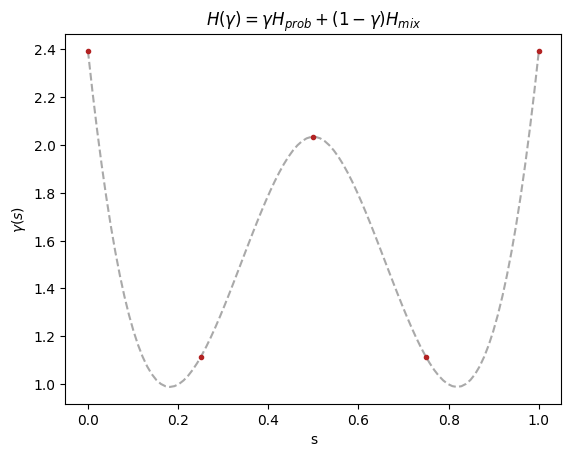

In [8]:
loss_opt = loss_ra(x1_opt, x2_opt, x3_opt)
print('Optimized spectral gap = ', -loss_opt.round(4))

schedule_opt = get_symmetric_schedule([x1_opt, x2_opt, x3_opt])
plot_schedule(schedule_opt, get_schedule_interpolator(schedule_opt, 'cubic')) 

In [9]:
ra_exp = {'n': n,
          'T': T,
          'interpolator_kind': interpolator_kind,
          't_max': t_max,
          'schedule_opt': schedule_opt.tolist(),
          'loss_opt': loss_opt,
          'first_optimizer': 'BO',
          'second_optimizer': 'None',
          'n_random_models': 1
          }

save_in_json(ra_exp, f'n{n}_{interpolator_kind}_BO.json')